<a href="https://colab.research.google.com/github/hummetova-gunay/Deep-Learning-Practice/blob/main/Housing_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simulate a dataset where house prices depend on square footage, number of rooms, and whether the house has a garden (binary).**

Dataset includes 200 houses with  features:




1.   square footage: uniformly random between 30 and 200
2.   number of rooms: randomly between 1 and 6
3.   whether has garden or not: 0 or 1 \\
target:

y=50+2⋅sqft+10⋅rooms+20⋅garden+noise \\

Fit using both analytical solution and gradient descent \\

Compare weights with the original parameters \\

Plot predicted vs true prices\\







In [2]:
import torch as t
import matplotlib.pyplot as plt
t.manual_seed(1)
N=200
sq_foot=t.linspace(30, 200, N)
num_rooms=t.arange(1,7,1)
has_garden=t.tensor([0,1])
y=50+2*sq_foot+10*num_rooms+20*has_garden+ 0.05*t.randn(N)

plt.scatter(sq_foot, y)
plt.xlabel("square foot")
plt.ylabel("price")

RuntimeError: The size of tensor a (200) must match the size of tensor b (6) at non-singleton dimension 0

**I am trying to add tensors with different sizes that are not broadcastable**

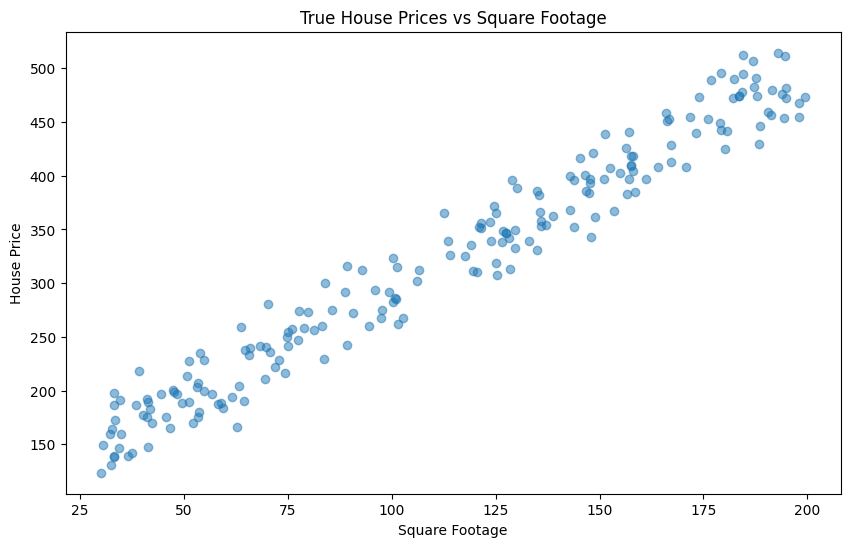

In [3]:
import numpy as np
np.random.seed(1)
N=200
sq_foot=t.FloatTensor(np.random.uniform(30,200, N)) #FloatTensor is used to convert the input into a Pytorch tensor
# print(sq_foot)
num_rooms=t.FloatTensor(np.random.randint(1,7,N))
# print(num_rooms)
has_garden=t.FloatTensor(np.random.choice([0,1],N))
# print(has_garden)

#feature matrix:
X=t.stack([t.ones(N), sq_foot,num_rooms, has_garden], dim=1)
# print(X.shape)

true_w=t.tensor([50.0, 2.0, 10.0, 20.0]) #coefficients
noise=10*t.randn(N)

y=X@true_w + noise

plt.figure(figsize=(10, 6))
plt.scatter(sq_foot.numpy(), y.numpy(), alpha=0.5)
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.title('True House Prices vs Square Footage')
plt.show()

In [9]:
#analytical formula
weights1=t.linalg.inv(X.mT@X)@(X.mT@y)
print(weights1)

tensor([50.9727,  2.0036,  9.6072, 19.4836])


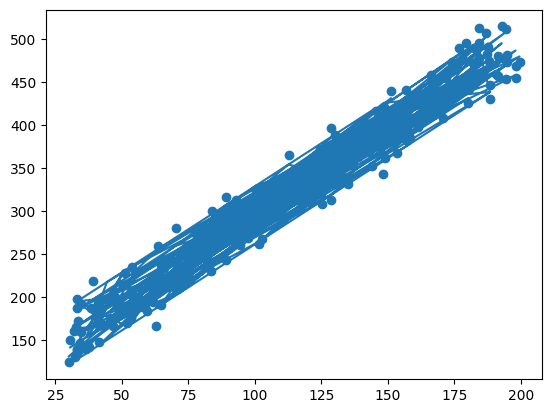

In [10]:
#plotting prediction using analyical formula
y_pred1=X@weights1
plt.plot(sq_foot, y_pred1)
plt.scatter(sq_foot, y)

**plt.plot(x, y) connects points in order — and sq_foot is not sorted.**


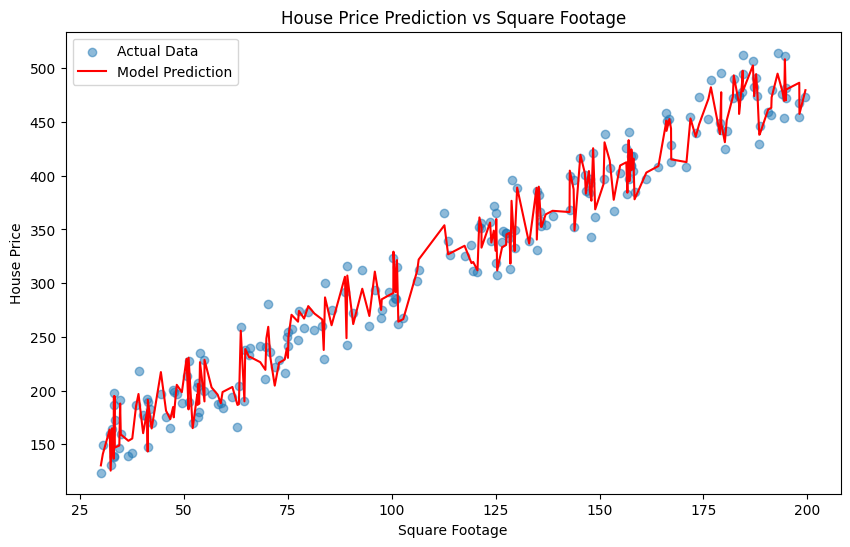

In [11]:
# Sort sq_foot and corresponding predictions for a clean line plot
sorted_indices = t.argsort(sq_foot)
sorted_sq_foot = sq_foot[sorted_indices]
sorted_y_pred1 = y_pred1[sorted_indices]

plt.figure(figsize=(10, 6))
plt.scatter(sq_foot, y, alpha=0.5, label='Actual Data')
plt.plot(sorted_sq_foot, sorted_y_pred1, color='red', label='Model Prediction')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.title('House Price Prediction vs Square Footage')
plt.legend()
plt.show()


In [14]:
#loss function
def loss(w):
  y_pred=X@w
  return ((y-y_pred)**2).sum()
#gradient
def grad(w):
  y_pred=X@w
  return -2*X.mT@(y-y_pred)

#optimal weights
eta = 1e-6
weights2=t.zeros(4)
for _ in range(100):
  weights2=weights2-eta*grad(weights2)
  print(loss(weights2))
print(weights2)


tensor(5.9232e+08)
tensor(1.5682e+10)
tensor(4.1545e+11)
tensor(1.1006e+13)
tensor(2.9158e+14)
tensor(7.7247e+15)
tensor(2.0465e+17)
tensor(5.4215e+18)
tensor(1.4363e+20)
tensor(3.8051e+21)
tensor(1.0081e+23)
tensor(2.6706e+24)
tensor(7.0751e+25)
tensor(1.8744e+27)
tensor(4.9656e+28)
tensor(1.3155e+30)
tensor(3.4851e+31)
tensor(9.2329e+32)
tensor(2.4460e+34)
tensor(6.4801e+35)
tensor(1.7167e+37)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(inf)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
tensor(nan)
t

**the problem is : Gradient blowing up (inf/nan), solution: Using smaller learning rate**